## General setting

In [ ]:
# Connect to your own google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import libraries 
from bs4 import BeautifulSoup
# send request to scape a web page
import requests
import time
import datetime

import smtplib
import csv
import pandas as pd
import shutil

## 1.0 Single Page Scraping with BeautifulSoup


- Scrape Amazon Product's title and ratings
- URL: https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&customId=B0752XJYNL&th=1
- Data type: HTML data

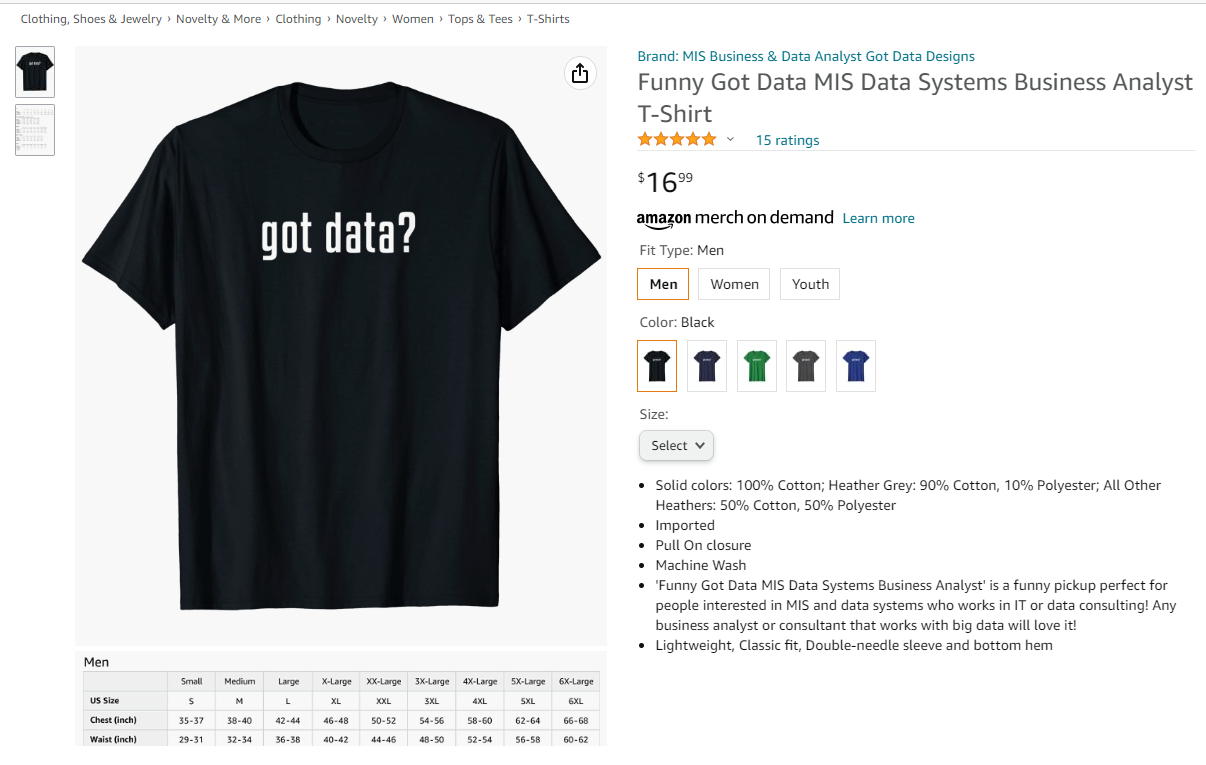

In [ ]:
def scrappingAmazonProductRatings(webURL, productTitleId, productRatingId):
  URL = webURL
  # Find your user agent: https://httpbin.org/get (depends on OS of your laptop (Windows or MacOS))
  headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
  page = requests.get(URL, headers=headers)
  soup1 = BeautifulSoup(page.content, "html.parser")

  # prettify() is used to format HTML data from soup1 in a better format
  soup2 = BeautifulSoup(soup1.prettify(), "html.parser")
  title = soup2.find(id=productTitleId).get_text()
  rating = soup2.find(id=productRatingId).get_text()

  # Formatting data after scapping
  # Remove white space and unwanted characters
  title1 = title.strip()
  rating1 = rating.strip()[:-8]

  # Create a Timestamp for your output to track when data was collected
  today = datetime.date.today()

  # Create CSV and write headers and data into the file
  col_Names=['Title', 'Rating', 'Date']
  data = [title1, rating1, today]


  #Now we are appending data to the csv
  with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)


# Feed parameters for scrappingAmazonProductRatings function 
# scrappingAmazonProductRatings('https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&customId=B0752XJYNL&th=1', 
#                                 'productTitle', 
#                                 'acrCustomerReviewText')
# df = pd.read_csv('AmazonWebScraperDataset.csv',names=col_Names)
# df


In [ ]:
# Set up time to automatic running the scrappingAmazonProductRatings() function
# default: I set the scrappingAmazonProductRatings() function auto run every 1s
while(True):
  scrappingAmazonProductRatings('https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&customId=B0752XJYNL&th=1', 
                                'productTitle', 
                                'acrCustomerReviewText')
  time.sleep(1)


In [ ]:
df = pd.read_csv('AmazonWebScraperDataset.csv', header=None)
df.columns = ['Title', 'Rating', 'Date']
df

,Title,Rating,Date
0,Funny Got Data MIS Data Systems Business Analy...,15,2022-12-08
1,Funny Got Data MIS Data Systems Business Analy...,15,2022-12-08
2,Funny Got Data MIS Data Systems Business Analy...,15,2022-12-08
3,Funny Got Data MIS Data Systems Business Analy...,15,2022-12-08
4,Funny Got Data MIS Data Systems Business Analy...,15,2022-12-08
...,...,...,...
227,Funny Got Data MIS Data Systems Business Analy...,15,2022-12-08
228,Funny Got Data MIS Data Systems Business Analy...,15,2022-12-08
229,Funny Got Data MIS Data Systems Business Analy...,15,2022-12-08
230,Funny Got Data MIS Data Systems Business Analy...,15,2022-12-08


In [ ]:
# Create Amazon folder to store csv file
import os
amazon_data_path = "/content/gdrive/MyDrive/Web Scraping Tutorials/Amazon/"
os.makedirs(amazon_data_path)

# Move csv file just created to specific
shutil.move("/content/AmazonWebScraperDataset.csv", amazon_data_path)

'/content/gdrive/MyDrive/Web Scraping Tutorials/Amazon/AmazonWebScraperDataset.csv'

## 2.0 Multiple Pages (Pages with pagination) Scraping with BeautifulSoup

- Scrape NHL Teams Performance
- URL: https://www.scrapethissite.com/pages/forms/
- Data type: HTML data (multiple pages)
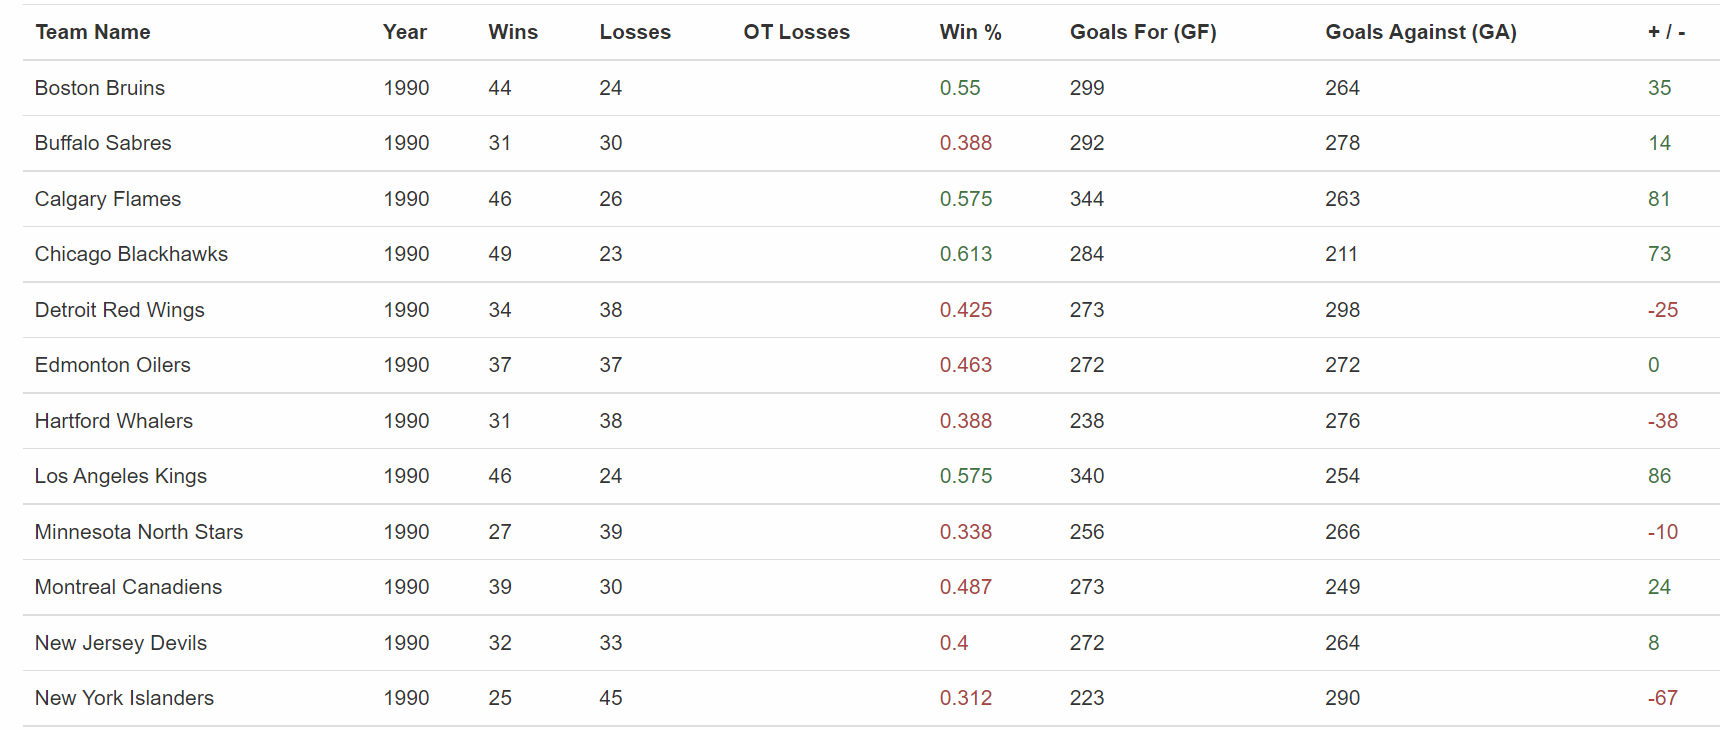

In [ ]:
def scrappingHockeyTeamsPerformance(webURL, CURRENT_PAGE, MAX_PAGE ):
  hookeyTeams = []
  for i in range(CURRENT_PAGE, MAX_PAGE):
    url = f'{webURL}?page_num={i}'
    response = requests.get(url)
    response = response.content
    soup = BeautifulSoup(response, 'html.parser')
    for entry in soup.find_all('tr', {'class': 'team'}):
            team = entry.find('td', {'class': 'name'}).text.strip()
            wins = entry.find('td', {'class': 'wins'}).text.strip()
            year = entry.find('td', {'class': 'year'}).text.strip()
            losses = entry.find('td', {'class': 'losses'}).text.strip()
            hookeyTeams.append([team, wins, year, losses])
    
  df = pd.DataFrame(hookeyTeams, columns=['Team', 'Wins', 'Year', 'Losses'])
  df.to_csv('HockeyTeamScraperDataset.csv')
  df1 = pd.read_csv(r'HockeyTeamScraperDataset.csv')
  return df1

In [ ]:
scrappingHockeyTeamsPerformance('https://www.scrapethissite.com/pages/forms/', 1, 4)

,Unnamed: 0,Team,Wins,Year,Losses
0,0,Boston Bruins,44,1990,24
1,1,Buffalo Sabres,31,1990,30
2,2,Calgary Flames,46,1990,26
3,3,Chicago Blackhawks,49,1990,23
4,4,Detroit Red Wings,34,1990,38
...,...,...,...,...,...
70,70,Calgary Flames,42,1993,29
71,71,Chicago Blackhawks,39,1993,36
72,72,Dallas Stars,42,1993,29
73,73,Detroit Red Wings,46,1993,30
